
[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip


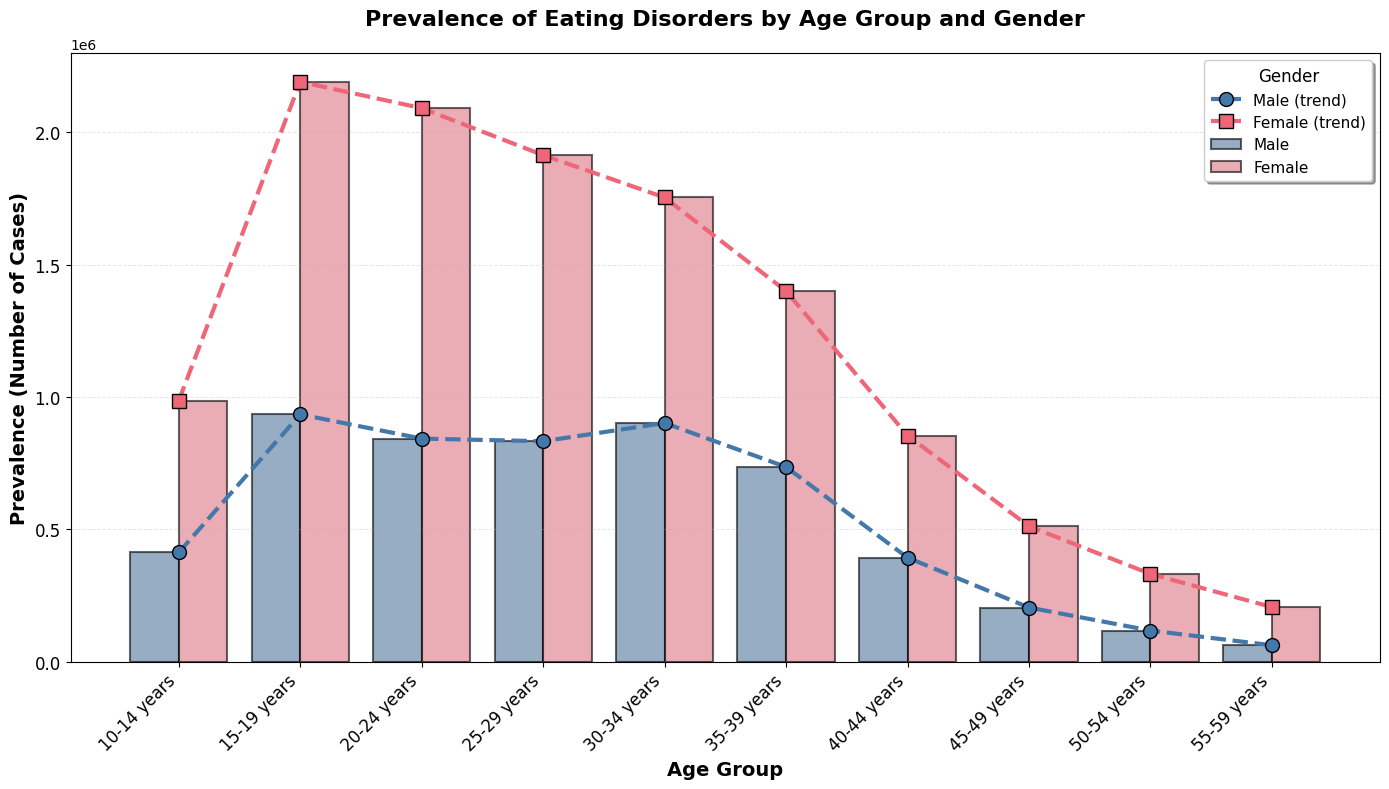

In [76]:
!pip install pandas
!pip install matplotlib seaborn numpy   

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#first dataset
df = pd.read_csv("data/data1.csv")


df_plot = df[
    (df["cause_name"] == "Eating disorders") &
    (df["measure_name"] == "Prevalence")
]


df_plot = df_plot[["age_name", "sex_name", "val"]]

plt.figure(figsize=(14, 8))

age_order = [
    "10-14 years", "15-19 years", "20-24 years",
    "25-29 years", "30-34 years", "35-39 years", "40-44 years",
    "45-49 years", "50-54 years", "55-59 years"
]


colors = ['#4477AA', '#EE6677']  


ax = sns.barplot(
    data=df_plot,
    x="age_name",
    y="val",
    hue="sex_name",
    order=age_order,
    palette=colors,
    alpha=0.6,
    edgecolor='black',
    linewidth=1.5
)

markers = ['o', 's']  
for idx, sex in enumerate(df_plot["sex_name"].unique()):
    sex_data = df_plot[df_plot["sex_name"] == sex]
    line_data = sex_data.groupby("age_name")["val"].mean().reindex(age_order)
    plt.plot(
        range(len(age_order)), 
        line_data.values, 
        marker=markers[idx], 
        linewidth=3, 
        markersize=10,
        color=colors[idx],
        label=f'{sex} (trend)',
        linestyle='--',
        markeredgecolor='black',
        markeredgewidth=1
    )


plt.xlabel("Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Prevalence (Number of Cases)", fontsize=14, fontweight='bold')
plt.title("Prevalence of Eating Disorders by Age Group and Gender", 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.legend(title="Gender", title_fontsize=12, fontsize=11, 
           frameon=True, shadow=True, loc='best')


plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)


plt.tight_layout()


plt.savefig('eating_disorders_prevalence.png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
#read second dataset
df2 = pd.read_csv("data/data2.csv")
df2.head()

,Age_Range,Gender,current_city,Current_EducationLevel,Employment_Status,Marital_Status,EatLess_OnWeightGain,EatLess_AtMealtime,RefuseFood_WeightConcern,Monitor_Food,...,Days_TriedLimitFoodToControlShapeOrWeight,Days_FastedToControlShapeOrWeight,Days_ExcludedFoodToControlShapeOrWeight,Days_FollowedRulesToControlShapeOrWeight,Days_FearLosingControlOverEating,Eat_SpecificFoodsHabitually,Location_TriggersHabitualEating,AutomaticEating_WhenExperiencingStrongEmotion,Realize_AfterEatingOutOfHabit,Perception_EatingDisorder
0,18-24,Male,Rajshahi,Bachelor's degree 3rd year,Student,In a relationship,Often,Never,Sometimes,Sometimes,...,13-27 days,Every day,1-12 days,Every day,1-12 days,Often,Often,Sometimes,Never,"Yes, I believe I do"
1,25-34,Female,Chattogram,Master's degree 2nd year,Self-employed,Married,Often,Often,Seldom,Often,...,1-12 days,13-27 days,13-27 days,No days,13-27 days,Often,Sometimes,Never,Never,"Yes, I believe I do"
2,18-24,Male,Khulna,Bachelor's degree 2nd year,Student,Single,Often,Never,Often,Seldom,...,Every day,1-12 days,1-12 days,13-27 days,1-12 days,Never,Sometimes,Never,Never,"Yes, I believe I do"
3,18-24,Female,Dhaka,Bachelor's degree 2nd year,Self-employed,Married,Often,Often,Never,Sometimes,...,Every day,1-12 days,Every day,1-12 days,1-12 days,Sometimes,Often,Often,Often,"Yes, I believe I do"
4,18-24,Male,Sylhet,Bachelor's degree 3rd year,Student,Single,Sometimes,Never,Seldom,Often,...,1-12 days,13-27 days,1-12 days,1-12 days,1-12 days,Often,Often,Seldom,Often,"Yes, I believe I do"


Plot 2 below uses data from 'Neurobehavioural on Eating Disorder Perceptions Among Bangladeshi university students', sourced from Mendeley Data

/var/folders/0s/pxx_7k9n2572ygwnhl21g6nw0000gn/T/ipykernel_44431/1455091735.py:24: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x / x.sum() * 100)


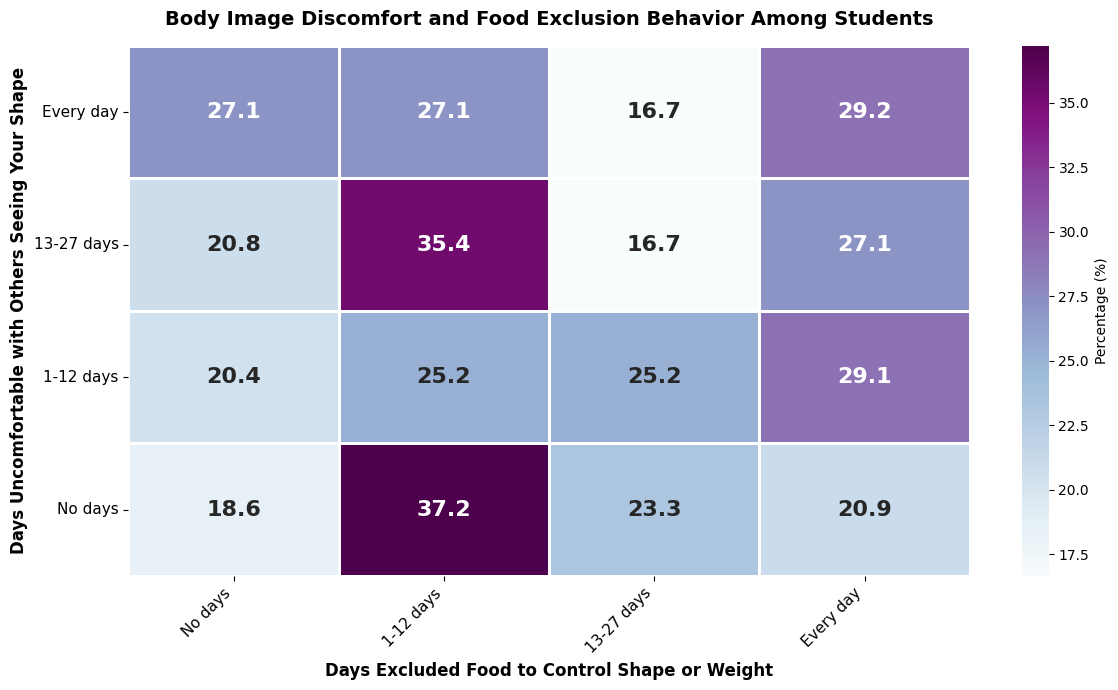

In [78]:
#plot 2
order = ["No days", "1-12 days", "13-27 days", "Every day"]

students["Days_UncomfortableOthersSeeingYourShape"] = pd.Categorical(
    students["Days_UncomfortableOthersSeeingYourShape"],
    categories=order,
    ordered=True
)

students["Days_ExcludedFoodToControlShapeOrWeight"] = pd.Categorical(
    students["Days_ExcludedFoodToControlShapeOrWeight"],
    categories=order,
    ordered=True
)

cross_tab = (
    students
    .groupby([
        "Days_UncomfortableOthersSeeingYourShape",
        "Days_ExcludedFoodToControlShapeOrWeight"
    ])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .reset_index(name="Percentage")
)

heatmap_data = cross_tab.pivot(
    index="Days_UncomfortableOthersSeeingYourShape",
    columns="Days_ExcludedFoodToControlShapeOrWeight",
    values="Percentage"
)

# Reverse x-axis order
heatmap_data = heatmap_data.iloc[::-1]

plt.figure(figsize=(12, 7))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="BuPu",
    cbar_kws={'label': 'Percentage (%)'},
    linewidths=1,
    linecolor='white',
    annot_kws={"fontsize": 16, "fontweight": "bold"}
)

plt.title("Body Image Discomfort and Food Exclusion Behavior Among Students", 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Days Excluded Food to Control Shape or Weight", 
           fontsize=12, fontweight='bold')
plt.ylabel("Days Uncomfortable with Others Seeing Your Shape", 
           fontsize=12, fontweight='bold')
plt.xticks(fontsize=11, rotation=45, ha='right')
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

plt.savefig('body_image_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [84]:
#(supplementary dataset)
df3 = pd.read_csv("data/data3.csv")
df3.head(10)

,population_group_id,population_group_name,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,559,Schizophrenia,1,Number,2023,31279.393715,38842.530818,24278.484052
1,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,567,Depressive disorders,1,Number,2023,108869.308988,130723.597359,91630.907468
2,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,570,Bipolar disorder,1,Number,2023,37138.194985,46265.974366,29524.567688
3,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,571,Anxiety disorders,1,Number,2023,174586.697545,220193.276178,131467.214456
4,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,572,Eating disorders,1,Number,2023,25962.158833,34519.363620,19827.249519
5,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,575,Autism spectrum disorders,1,Number,2023,78642.734232,118111.983458,49086.920929
6,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,578,Attention-deficit/hyperactivity disorder,1,Number,2023,59508.685418,81066.521966,41986.195948
7,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,579,Conduct disorder,1,Number,2023,14560.321204,18512.675807,10696.800959
8,1,All Population,5,Prevalence,69,Singapore,3,Both,22,All ages,582,Idiopathic developmental intellectual disability,1,Number,2023,6666.292120,18677.443020,1024.490796


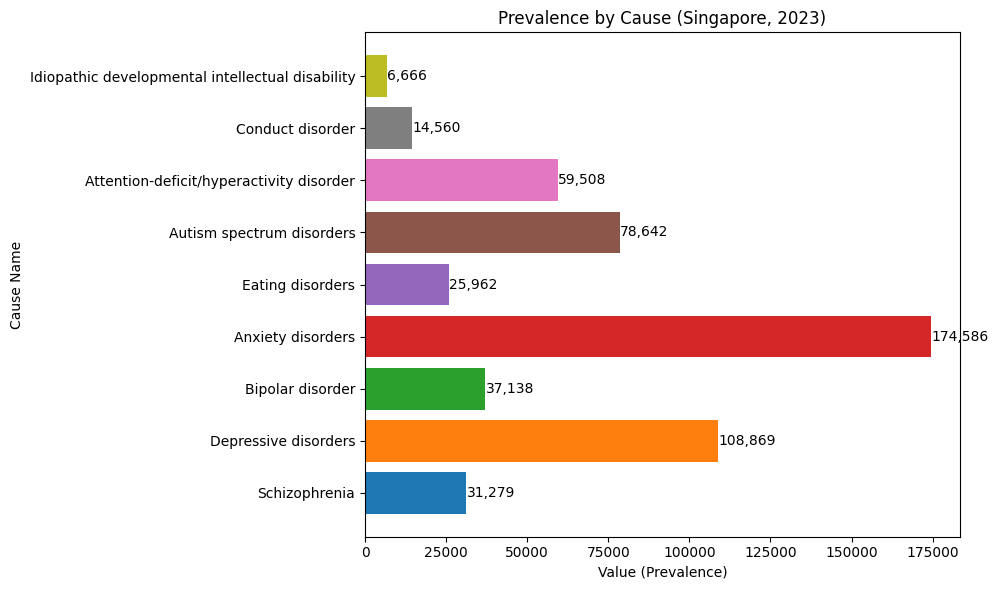

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colors = plt.cm.tab10.colors  # colorblind-friendly palette
plt.barh(
    df3["cause_name"],
    df3["val"],
    color=colors[:len(df3)]
)

for index, value in enumerate(df3["val"]):
    plt.text(value, index, f"{int(value):,}", va="center", ha="left")


plt.xlabel("Value (Prevalence)")
plt.ylabel("Cause Name")
plt.title("Prevalence by Cause (Singapore, 2023)")
plt.tight_layout()
plt.show()


In order to generate plot 3, after running the code, it will appear as HTML locally. Open the HTML locally to view the graphical map for plot 3

In [88]:
#code for plot 3 - map of polyclinics in Singapore

import pandas as pd
!pip install folium
import folium

clinics_data = [
    # Existing clinics
    {"name": "Ang Mo Kio Polyclinic", "lat": 1.372483, "lon": 103.847165, "type": "general"},
    {"name": "Bedok Polyclinic", "lat": 1.32694, "lon": 103.93161, "type": "general"},
    {"name": "Bukit Batok Polyclinic", "lat": 1.3517, "lon": 103.7477, "type": "general"},
    {"name": "Bukit Merah Polyclinic", "lat": 1.2836914, "lon": 103.8170178, "type": "mental"},
    {"name": "Bukit Panjang Polyclinic", "lat": 1.3820, "lon": 103.7630, "type": "general"},
    {"name": "Choa Chu Kang Polyclinic", "lat": 1.3850, "lon": 103.7460, "type": "dementia"},
    {"name": "Clementi Polyclinic", "lat": 1.3150, "lon": 103.7650, "type": "general"},
    {"name": "Eunos Polyclinic", "lat": 1.3230, "lon": 103.9000, "type": "general"},
    {"name": "Geylang Polyclinic", "lat": 1.3180, "lon": 103.8880, "type": "mental"},
    {"name": "Hougang Polyclinic", "lat": 1.3700, "lon": 103.8920, "type": "general"},
    {"name": "Jurong Polyclinic", "lat": 1.3470, "lon": 103.7100, "type": "general"},
    {"name": "Kallang Polyclinic", "lat": 1.3130, "lon": 103.8640, "type": "general"},
    {"name": "Khatib Polyclinic", "lat": 1.4250, "lon": 103.7780, "type": "dementia"},
    {"name": "Outram Polyclinic", "lat": 1.2800, "lon": 103.8370, "type": "general"},
    {"name": "Pioneer Polyclinic", "lat": 1.3450, "lon": 103.6830, "type": "general"},
    {"name": "Punggol Polyclinic", "lat": 1.40316, "lon": 103.91317, "type": "general"},
    {"name": "Queenstown Polyclinic", "lat": 1.2930, "lon": 103.7990, "type": "mental"},
    {"name": "Sembawang Polyclinic", "lat": 1.4500, "lon": 103.8200, "type": "general"},
    {"name": "Tampines Polyclinic", "lat": 1.3530, "lon": 103.9450, "type": "general"},
    {"name": "Toa Payoh Polyclinic", "lat": 1.3340, "lon": 103.8500, "type": "general"},
    {"name": "Woodlands Polyclinic", "lat": 1.4370, "lon": 103.7860, "type": "general"},
    {"name": "Yishun Polyclinic", "lat": 1.4280, "lon": 103.8350, "type": "dementia"},
# white clinics - no mental health services
    {"name": "Serangoon Polyclinic", "lat": 1.3500, "lon": 103.8730, "type": "other"},
    {"name": "Marine Parade Polyclinic", "lat": 1.3020, "lon": 103.9060, "type": "other"},
    {"name": "Pasir Ris Polyclinic", "lat": 1.3730, "lon": 103.9490, "type": "other"},
    {"name": "Bishan Polyclinic", "lat": 1.3508, "lon": 103.8485, "type": "other"},
    {"name": "Novena Polyclinic", "lat": 1.3200, "lon": 103.8440, "type": "other"},
    {"name": "Upper Thomson Polyclinic", "lat": 1.3540, "lon": 103.8360, "type": "other"},
    {"name": "Telok Blangah Polyclinic", "lat": 1.2720, "lon": 103.8070, "type": "other"},
    {"name": "Chinatown Polyclinic", "lat": 1.2840, "lon": 103.8430, "type": "other"},
    {"name": "MacPherson Polyclinic", "lat": 1.3260, "lon": 103.8890, "type": "other"},
    {"name": "Lorong Chuan Polyclinic", "lat": 1.3510, "lon": 103.8630, "type": "other"},
    {"name": "Sengkang Polyclinic", "lat": 1.3917, "lon": 103.8950, "type": "other"},
    {"name": "Jurong East Polyclinic", "lat": 1.3330, "lon": 103.7430, "type": "other"},
    {"name": "Boon Lay Polyclinic", "lat": 1.3380, "lon": 103.7060, "type": "other"},
    {"name": "Bukit Timah Polyclinic", "lat": 1.3294, "lon": 103.8021, "type": "other"}

]

df = pd.DataFrame(clinics_data)

sg_map = folium.Map(location=[1.3521, 103.8198], zoom_start=11)

#Color mapping for clinic types
type_colors = {
    "general": "blue",
    "mental": "green",
    "dementia": "red",
    "other": "white"
}
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=7,
        color="black" if row["type"] == "other" else type_colors[row["type"]],
        fill=True,
        fill_color=type_colors[row["type"]],
        fill_opacity=0.9,
        popup=f"{row['name']} ({row['type']})"
    ).add_to(sg_map)

#legend
legend_html = """
<div style="
    position: fixed;
    bottom: 40px;
    left: 40px;
    width: 200px;
    background-color: white;
    border: 2px solid grey;
    z-index: 9999;
    font-size: 14px;
    padding: 10px;
">
<b>Clinic Type</b><br>
<span style="color: blue;">●</span> General + Mental Health<br>
<span style="color: green;">●</span> Mental Health Only<br>
<span style="color: red;">●</span> Dementia Only<br>
<span style="color: black;">●</span> Other Polyclinics (White)
</div>
"""

sg_map.get_root().html.add_child(folium.Element(legend_html))


sg_map.save("singapore_polyclinics_map.html")
print("Map saved as singapore_polyclinics_map.html")



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip
Map saved as singapore_polyclinics_map.html
